In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
airlines = pd.read_csv('airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [13]:
airports = pd.read_csv('airports.csv')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [14]:
flights = pd.read_csv('flights.csv', low_memory=False)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
flights.loc[0]

YEAR                     2015
MONTH                       1
DAY                         1
DAY_OF_WEEK                 4
AIRLINE                    AS
FLIGHT_NUMBER              98
TAIL_NUMBER            N407AS
ORIGIN_AIRPORT            ANC
DESTINATION_AIRPORT       SEA
SCHEDULED_DEPARTURE         5
DEPARTURE_TIME           2354
DEPARTURE_DELAY           -11
TAXI_OUT                   21
WHEELS_OFF                 15
SCHEDULED_TIME            205
ELAPSED_TIME              194
AIR_TIME                  169
DISTANCE                 1448
WHEELS_ON                 404
TAXI_IN                     4
SCHEDULED_ARRIVAL         430
ARRIVAL_TIME              408
ARRIVAL_DELAY             -22
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON       NaN
AIR_SYSTEM_DELAY          NaN
SECURITY_DELAY            NaN
AIRLINE_DELAY             NaN
LATE_AIRCRAFT_DELAY       NaN
WEATHER_DELAY             NaN
Name: 0, dtype: object

In [26]:
print (airlines.shape)
print (airports.shape)
print (flights.shape)

(14, 2)
(322, 7)
(5819079, 31)


After taking a look at the files we have, we check how many NaN values exist in them.

In [22]:
for col in airlines:
    print ("%d NULL values in column %s" % (airlines[col].isnull().sum(), col))

0 NULL values in column IATA_CODE
0 NULL values in column AIRLINE


In [24]:
for col in airports:
    print ("%d NULL values in column %s" % (airports[col].isnull().sum(), col))

0 NULL values in column IATA_CODE
0 NULL values in column AIRPORT
0 NULL values in column CITY
0 NULL values in column STATE
0 NULL values in column COUNTRY
3 NULL values in column LATITUDE
3 NULL values in column LONGITUDE


In [25]:
for col in flights:
    print ("%d NULL values in column %s" % (flights[col].isnull().sum(), col))

0 NULL values in column YEAR
0 NULL values in column MONTH
0 NULL values in column DAY
0 NULL values in column DAY_OF_WEEK
0 NULL values in column AIRLINE
0 NULL values in column FLIGHT_NUMBER
14721 NULL values in column TAIL_NUMBER
0 NULL values in column ORIGIN_AIRPORT
0 NULL values in column DESTINATION_AIRPORT
0 NULL values in column SCHEDULED_DEPARTURE
86153 NULL values in column DEPARTURE_TIME
86153 NULL values in column DEPARTURE_DELAY
89047 NULL values in column TAXI_OUT
89047 NULL values in column WHEELS_OFF
6 NULL values in column SCHEDULED_TIME
105071 NULL values in column ELAPSED_TIME
105071 NULL values in column AIR_TIME
0 NULL values in column DISTANCE
92513 NULL values in column WHEELS_ON
92513 NULL values in column TAXI_IN
0 NULL values in column SCHEDULED_ARRIVAL
92513 NULL values in column ARRIVAL_TIME
105071 NULL values in column ARRIVAL_DELAY
0 NULL values in column DIVERTED
0 NULL values in column CANCELLED
5729195 NULL values in column CANCELLATION_REASON
4755640 

Some airports have missing latitude and longitude. But that is not a problem since we can always find that information online if we need that. We mainly want to use DEPARTURE_DELAY and ARRIVAL_DELAY and so we want to find out why they are missing. We can see that all the flights with missing DEPARTURE_DELAY are cancelled while all the flights with missing ARRIVAL_DELAY are cancelled or diverted.

In [32]:
(flights['DEPARTURE_DELAY'].isnull() & flights['CANCELLED']).sum()

86153

In [33]:
(flights['ARRIVAL_DELAY'].isnull() & (flights['CANCELLED'] | flights['DIVERTED'])).sum()

105071

In [35]:
flights['CANCELLED'].sum()

89884

In [38]:
flights['DIVERTED'].sum()

15187

In [53]:
flights.loc[(~flights['DEPARTURE_DELAY'].isnull() & flights['CANCELLED']), ['DEPARTURE_DEALY', 'CANCELLED']].head()

,DEPARTURE_DEALY,CANCELLED
4391,NaN,1
4766,NaN,1
7441,NaN,1
8516,NaN,1
10454,NaN,1


In [46]:
(flights['DEPARTURE_DELAY'].isnull() & flights['CANCELLED']).sum()

86153

In [98]:
volume = pd.DataFrame({'flight_volume' : flights.groupby(['AIRLINE'])['AIRLINE'].count()}).reset_index()
cancel_rate = pd.DataFrame({'cancellation_rate' : flights.groupby(['AIRLINE'])['CANCELLED'].mean()}).reset_index()
divert_rate = pd.DataFrame({'divert_rate' : flights.groupby(['AIRLINE'])['DIVERTED'].mean()}).reset_index()
arrival_delay = pd.DataFrame({'arrival_delay' : flights.groupby(['AIRLINE'])['ARRIVAL_DELAY'].mean()}).reset_index()
departure_delay = pd.DataFrame({'departure_delay' : flights.groupby(['AIRLINE'])['DEPARTURE_DELAY'].mean()}).reset_index()

In [106]:
summary = volume.merge(cancel_rate, on='AIRLINE').merge(divert_rate, on='AIRLINE').merge(arrival_delay, on='AIRLINE').merge(departure_delay, on='AIRLINE')

In [183]:
plt.figure(figsize=(30, 30))
plt.subplot(3,2,1)
plt.bar(range(14), summary['flight_volume'], tick_label = volume['AIRLINE'])
plt.title("flight_volume")

In [184]:
plt.subplot(3,2,3)
x = range(14)
plt.xticks(x, volume['AIRLINE'])
plt.plot(x, summary['cancellation_rate'])
plt.title("calcellation rate")

In [185]:
plt.subplot(3,2,4)
x = range(14)
plt.xticks(x, volume['AIRLINE'])
plt.plot(x, summary['divert_rate'])
plt.title("divert rate")

In [186]:
plt.subplot(3,2,5)
x = range(14)
plt.xticks(x, volume['AIRLINE'])
plt.plot(x, summary['arrival_delay'])
plt.title("arrival delay")

In [187]:
plt.subplot(3,2,6)
x = range(14)
plt.xticks(x, volume['AIRLINE'])
plt.plot(x, summary['departure_delay'])
plt.title("departure delay")

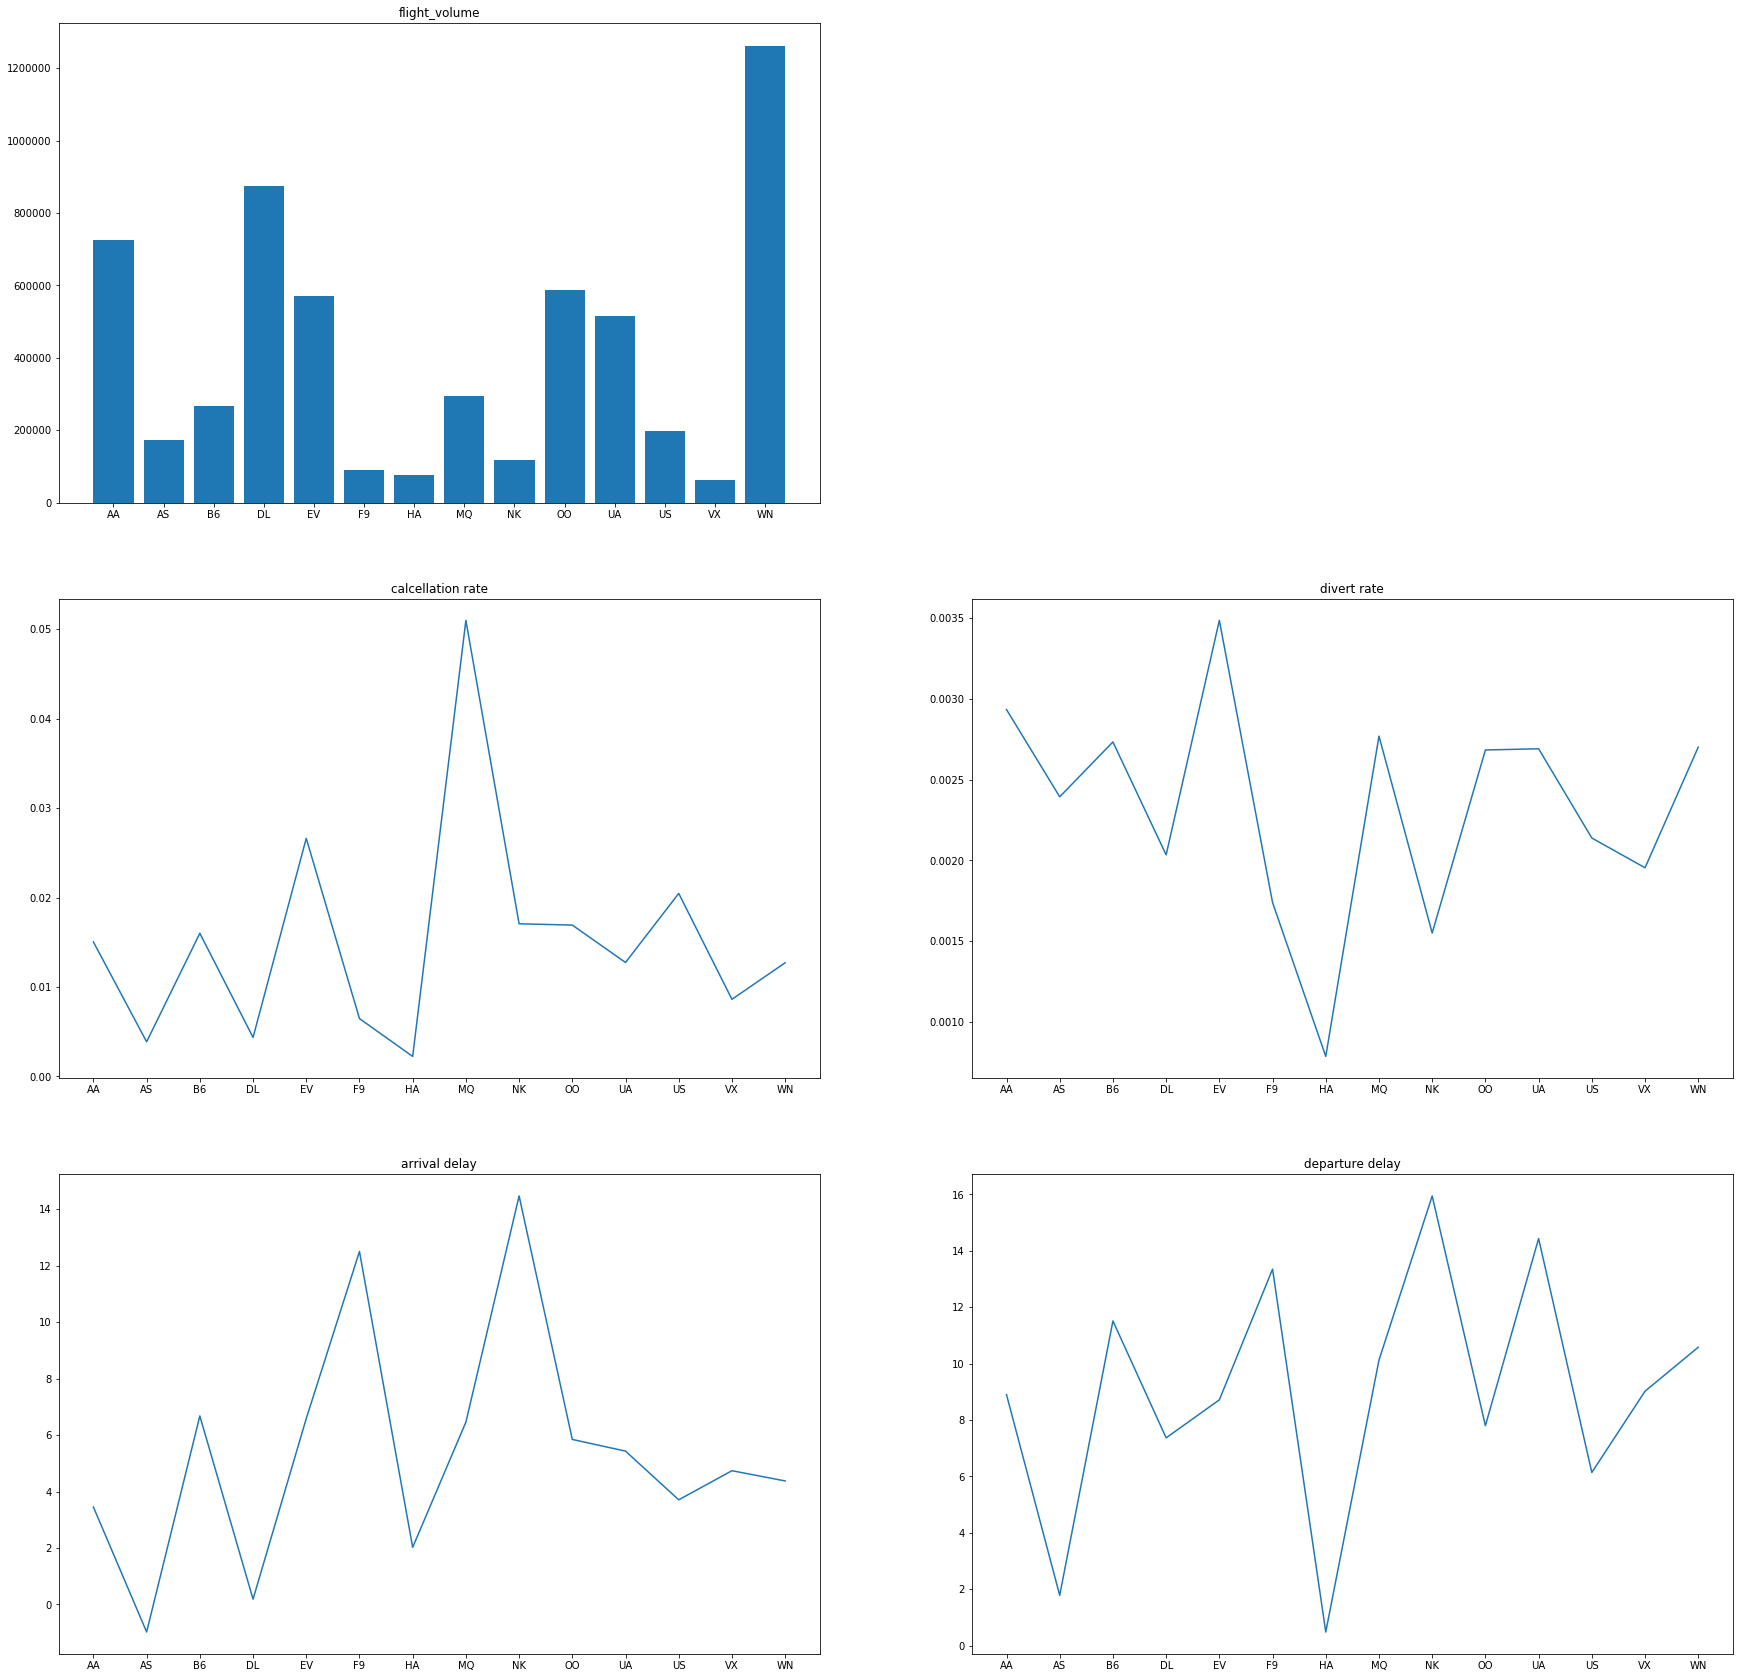

In [188]:
plt.show()

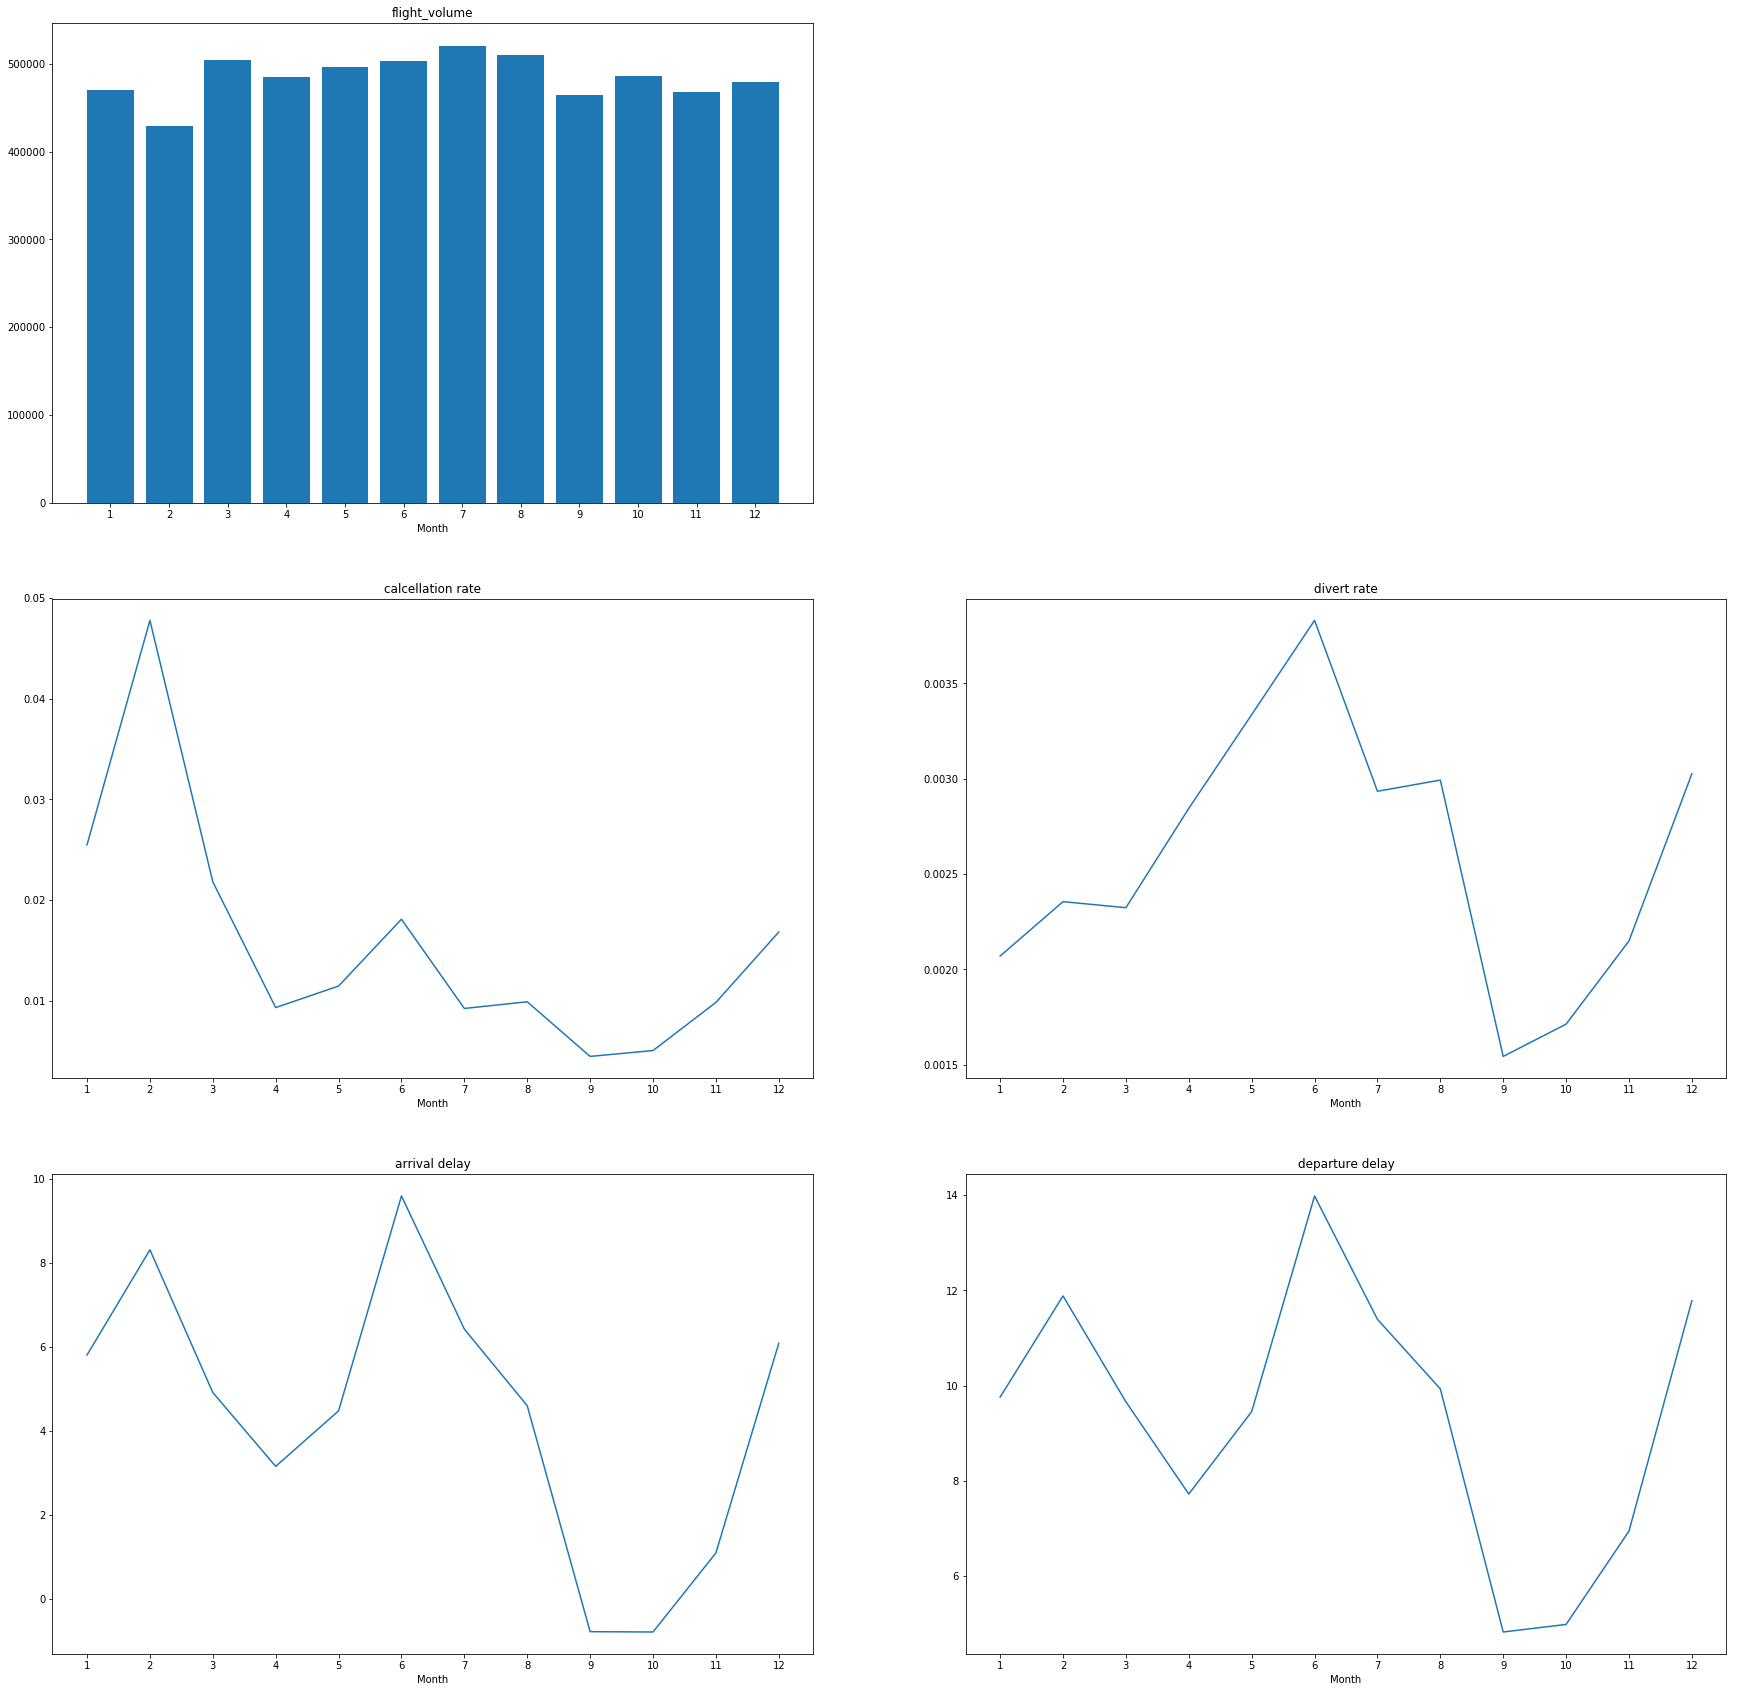

In [195]:
volume = pd.DataFrame({'flight_volume' : flights.groupby(['MONTH'])['AIRLINE'].count()}).reset_index()
cancel_rate = pd.DataFrame({'cancellation_rate' : flights.groupby(['MONTH'])['CANCELLED'].mean()}).reset_index()
divert_rate = pd.DataFrame({'divert_rate' : flights.groupby(['MONTH'])['DIVERTED'].mean()}).reset_index()
arrival_delay = pd.DataFrame({'arrival_delay' : flights.groupby(['MONTH'])['ARRIVAL_DELAY'].mean()}).reset_index()
departure_delay = pd.DataFrame({'departure_delay' : flights.groupby(['MONTH'])['DEPARTURE_DELAY'].mean()}).reset_index()
summary1 = volume.merge(cancel_rate, on='MONTH').merge(divert_rate, on='MONTH').merge(arrival_delay, on='MONTH').merge(departure_delay, on='MONTH')
plt.figure(figsize=(30, 30))
plt.subplot(3,2,1)
plt.bar(range(12), summary1['flight_volume'], tick_label = volume['MONTH'])
plt.title("flight_volume")
plt.xlabel("Month")
plt.subplot(3,2,3)
x = range(12)
plt.xticks(x, volume['MONTH'])
plt.plot(x, summary1['cancellation_rate'])
plt.title("calcellation rate")
plt.xlabel("Month")
plt.subplot(3,2,4)
x = range(12)
plt.xticks(x, volume['MONTH'])
plt.plot(x, summary1['divert_rate'])
plt.title("divert rate")
plt.xlabel("Month")
plt.subplot(3,2,5)
x = range(12)
plt.xticks(x, volume['MONTH'])
plt.plot(x, summary1['arrival_delay'])
plt.title("arrival delay")
plt.xlabel("Month")
plt.subplot(3,2,6)
x = range(12)
plt.xticks(x, volume['MONTH'])
plt.plot(x, summary1['departure_delay'])
plt.title("departure delay")
plt.xlabel("Month")
plt.show()